In [1]:
import pandas_gbq
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
q='''
SELECT 
value.incentives.voucher_total_eur as incentive_value, 
value.order.gmv_eur as basket_value, 
is_discount, 
is_voucher, 
is_free_delivery 
FROM `fulfillment-dwh-production.curated_data_shared_coredata_business.orders` 
WHERE is_successful = true and global_entity_id="FO_NO" and date(partition_date_local) = "2023-12-12"
'''

In [3]:
df = pandas_gbq.read_gbq(q)

/Users/a.capuano/opt/miniconda3/envs/ml/lib/python3.10/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Downloading: 100%|██████████|


In [4]:
df.columns

Index(['incentive_value', 'basket_value', 'is_discount', 'is_voucher',
       'is_free_delivery'],
      dtype='object')

In [5]:
def plot_hist(df, subset):
    df_sub = df[df[subset]==True]
    print("Share: %", round(len(df_sub)*100/len(df), 2))
    fig, ax = plt.subplots(figsize = (4,4))
    ax.hist(df_sub['incentive_value'], alpha=0.5, label='incentive_value')
    ax.hist(df_sub['basket_value'], alpha=0.5, label='basket_value')
    ax.legend(loc='upper right')
    plt.show()

def plot_all(df):
    for col in df.columns:
        if "value" not in col and "is_" in col:
            print(col)
            plot_hist(df, col)

is_discount
Share: % 22.97


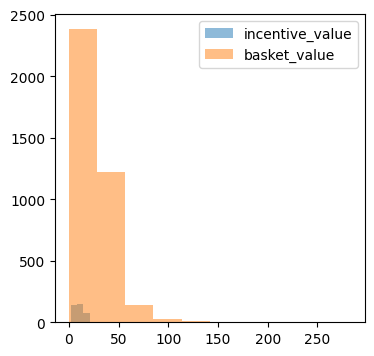

is_voucher
Share: % 10.5


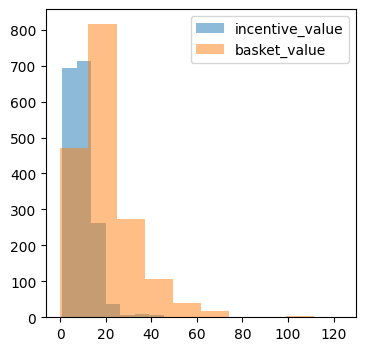

is_free_delivery
Share: % 28.78


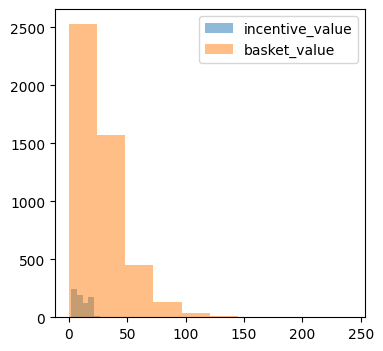

In [6]:
plot_all(df) #EUR

In [7]:
df.columns

Index(['incentive_value', 'basket_value', 'is_discount', 'is_voucher',
       'is_free_delivery'],
      dtype='object')

### Columns description:
#### Incentives
- **is_discount**: True if some other discount was given to the customer (other than voucher and joker), e.g. Meal deal / Happy hour / Free drink / Pizza Montag / Free Delivery etc.	
- **is_voucher**: True if a voucher code was used, when the customer types in a code during the order process to receive a price reduction.	
- **is_free_delivery**: True if there was no delivery fee for the order.	

Potentially interesting columns:
is_acquisition, is_corporate, is_qcommerce, value.incentives.wallet_total_eur

A way to differentiate dh vs vendor value is to look at the respective voucher amount (the column contains a voucher amount breakdown).

To calculate the incentive value:
vouchers.amount_eur field is similar to value.incentives.voucher_total_eur (field I actually used), but here the voucher value is divided against each voucher code/ campaign name


Commission data info comes a month later, however January did not seem to have data for the day